# Do the feature engineering according to the selection done in the exploratory data analysis and run a linear regression

In [1]:
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

import statsmodels.api as sm

import seaborn as sns

import scipy.stats as stats

from matplotlib import pyplot as plt

import numpy as np

In [2]:
df = pd.read_csv('hour.csv', index_col=0)
df.head()
df.casual.describe()

count    17379.000000
mean        35.676218
std         49.305030
min          0.000000
25%          4.000000
50%         17.000000
75%         48.000000
max        367.000000
Name: casual, dtype: float64

In [3]:
df['dteday'] = pd.to_datetime(df['dteday'])
df['dteday'].head()

instant
1   2011-01-01
2   2011-01-01
3   2011-01-01
4   2011-01-01
5   2011-01-01
Name: dteday, dtype: datetime64[ns]

#### Feature Engineering Function:

In [4]:
#weather = {1: 'nice_weather', 2: 'so_so_weather', 3: 'shit_weather'}
#weather_dummies = pd.get_dummies(df['weathersit'])
#weather_dummies = weather_dummies.drop(weather_dummies.columns[0], axis=1)
#weather_dummies.rename(mapper=weather, axis=1, inplace=True)
#x = pd.concat([x, weather_dummies], axis=1)
#x = x.drop('weathersit', axis=1)

#weather_dummies.head()

In [5]:
#feat = PolynomialFeatures(interaction_only=True)
#pd.DataFrame(feat.fit_transform(df[['workingday', 'hr']]), columns=[''])
df['interact'] = df['workingday'] * df['hr']
df

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,interact
instant,,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,0
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,0
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,0
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,0
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,0
6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1,0
7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2,0
8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3,0
9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8,0


In [6]:
def feature_engineer_r(x):
    x = x[['yr',
           'mnth',
           'hr',
           'holiday',
           'weekday',
           'workingday',
           'weathersit',
           #'temp',
           'atemp',
           'hum',
           'windspeed'
           ]]
    
    if 'mnth' in x:
        # create dummies for months; Feb is not significantly different from 0 and is therefore excluded
        months = {2: 'Feb',3: 'March',4: 'Apr',5: 'May',6: 'Jun',7: 'Jul',8: 'Aug',9: 'Sept',10: 'Oct',11: 'Nov',12: 'Dec'}
        mnth_dummies = pd.get_dummies(x['mnth'], drop_first=True)
        mnth_dummies = mnth_dummies.drop(mnth_dummies.columns[0:1], axis=1)
        mnth_dummies.rename(mapper=months, axis=1, inplace=True)
        x = pd.concat([x, mnth_dummies], axis=1)
        x = x.drop('mnth', axis=1)
        
    if 'workingday' in x and 'hr' in x:
        x['interact'] = x['workingday'] * x['hr']
        interact_dummies = pd.get_dummies(x['interact'], drop_first=True, prefix='interact')
        interact_dummies = interact_dummies.drop([interact_dummies.columns[0], interact_dummies.columns[1], interact_dummies.columns[2], interact_dummies.columns[3], interact_dummies.columns[19]], axis=1)
        x = pd.concat([x, interact_dummies], axis=1)
        x = x.drop('interact', axis=1)
        
    if 'hr' in x:
        # create dummies for hours
        hrs_dummies = pd.get_dummies(x['hr'], drop_first=True, prefix='hr')
        hrs_dummies = hrs_dummies.drop(hrs_dummies.columns[22], axis=1)
        x = pd.concat([x, hrs_dummies], axis=1)
        x = x.drop('hr', axis=1)
        
    if 'weekday' in x:
        # create dummies for the weekdays; it turns out that only saturdays yields a statistically significant result
        days = {1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'}
        wday_dummies = pd.get_dummies(x['weekday'], drop_first=True)
        wday_dummies = wday_dummies.drop([wday_dummies.columns[0], wday_dummies.columns[1], wday_dummies.columns[2], wday_dummies.columns[3], wday_dummies.columns[4]], axis=1)
        wday_dummies.rename(mapper=days, axis=1, inplace=True)
        #x = pd.concat([x, pd.DataFrame(wday_dummies['Sat'])], axis=1)
        x = pd.concat([x, wday_dummies], axis=1)
        x = x.drop('weekday', axis=1)
        
    if 'weathersit' in x:
        weather = {1: 'nice_weather', 2: 'so_so_weather', 3: 'shit_weather', 4: 'really shit weather'}
        weather_dummies = pd.get_dummies(x['weathersit'], drop_first=True)
        #weather_dummies = weather_dummies.drop(weather_dummies.columns[0], axis=1)
        weather_dummies.rename(mapper=weather, axis=1, inplace=True)
        x = pd.concat([x, weather_dummies], axis=1)
        x = x.drop('weathersit', axis=1)
        
    if 'atemp' in x:
        #x['atemps'] = pd.cut(x['atemp'], bins=5)
        #atemps_dummies = pd.get_dummies(x['atemps'], drop_first=True)
        #x = pd.concat([x, atemps_dummies], axis=1)
        x.loc[:, 'atemp2'] = x['atemp']**2
        x = x.drop('atemp', axis=1)#, 'atemps'], axis=1)
        
    
    return x

In [7]:
def feature_engineer_c(x):
    x = x[['yr',
           'mnth',
           'hr',
           'holiday',
           'weekday',
           'workingday',
           'weathersit',
           #'temp',
           'atemp',
           'hum',
           'windspeed'
           ]]
    
    if 'mnth' in x:
        # create dummies for months; Feb is not significantly different from 0 and is therefore excluded
        months = {2: 'Feb',3: 'March',4: 'Apr',5: 'May',6: 'Jun',7: 'Jul',8: 'Aug',9: 'Sept',10: 'Oct',11: 'Nov',12: 'Dec'}
        mnth_dummies = pd.get_dummies(x['mnth'], drop_first=True)
        mnth_dummies = mnth_dummies.drop([mnth_dummies.columns[0], mnth_dummies.columns[5]], axis=1)
        mnth_dummies.rename(mapper=months, axis=1, inplace=True)
        x = pd.concat([x, mnth_dummies], axis=1)
        x = x.drop('mnth', axis=1)
        
    if 'workingday' in x and 'hr' in x:
        x['interact'] = x['workingday'] * x['hr']
        interact_dummies = pd.get_dummies(x['interact'], drop_first=True, prefix='interact')
        interact_dummies = interact_dummies.drop([interact_dummies.columns[0], interact_dummies.columns[1], interact_dummies.columns[2], interact_dummies.columns[20], interact_dummies.columns[21], interact_dummies.columns[22]], axis=1)
        x = pd.concat([x, interact_dummies], axis=1)
        x = x.drop('interact', axis=1)
        
    if 'hr' in x:
        # create dummies for hours
        hrs_dummies = pd.get_dummies(x['hr'], drop_first=True, prefix='hr')
        hrs_dummies = hrs_dummies.drop([hrs_dummies.columns[0], hrs_dummies.columns[1], hrs_dummies.columns[6]], axis=1)
        x = pd.concat([x, hrs_dummies], axis=1)
        x = x.drop('hr', axis=1)
        
    if 'weekday' in x:
        # create dummies for the weekdays; it turns out that only saturdays yields a statistically significant result
        days = {1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'}
        wday_dummies = pd.get_dummies(x['weekday'], drop_first=True)
        #wday_dummies = wday_dummies.drop(wday_dummies.columns[0], axis=1)
        wday_dummies.rename(mapper=days, axis=1, inplace=True)
        #x = pd.concat([x, pd.DataFrame(wday_dummies['Sat'])], axis=1)
        x = pd.concat([x, wday_dummies], axis=1)
        x = x.drop('weekday', axis=1)
        
    if 'weathersit' in x:
        weather = {1: 'nice_weather', 2: 'so_so_weather', 3: 'shit_weather', 4: 'really shit weather'}
        weather_dummies = pd.get_dummies(x['weathersit'], drop_first=True)
        weather_dummies = weather_dummies.drop(weather_dummies.columns[2], axis=1)
        weather_dummies.rename(mapper=weather, axis=1, inplace=True)
        x = pd.concat([x, weather_dummies], axis=1)
        x = x.drop('weathersit', axis=1)
        
    if 'atemp' in x:
        #x['atemps'] = pd.cut(x['atemp'], bins=5)
        #atemps_dummies = pd.get_dummies(x['atemps'], drop_first=True)
        #x = pd.concat([x, atemps_dummies], axis=1)
        x.loc[:, 'atemp2'] = x['atemp']**2
        x = x.drop('atemp', axis=1)#, 'atemps'], axis=1)
        
    #if 
        
    
    return x

#### Split the data:

In [8]:
# split the data into input and output variables
X = df.drop('cnt', axis=1)
y = df['cnt']
casual = df['casual']
registered = df['registered'] 

# split the data into training and test data for casual
Xtrain, Xtest, ctrain, ctest = train_test_split(X, casual, random_state=42)

# split the data into training and test data for casual
Xtrain, Xtest, rtrain, rtest = train_test_split(X, registered, random_state=42)

# split the data into training and test data for casual
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=42)

#### Feature Engineering:

In [9]:
Xtrainr = feature_engineer_r(Xtrain)
Xtestr = feature_engineer_r(Xtest)
Xtrainc = feature_engineer_c(Xtrain)
Xtestc = feature_engineer_c(Xtest)
Xtrainr.head()

,yr,holiday,workingday,hum,windspeed,March,Apr,May,Jun,Jul,...,hr_18,hr_19,hr_20,hr_21,hr_22,Sat,so_so_weather,shit_weather,really shit weather,atemp2
instant,,,,,,,,,,,,,,,,,,,,,
1946,0,0,0,0.45,0.2537,1,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0.074365
13427,1,0,1,0.35,0.3582,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0.719952
12899,1,0,1,0.28,0.4627,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0.424452
2571,0,0,1,0.62,0.1940,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.121452
10765,1,0,1,0.39,0.3582,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.250000


In [10]:
#corr = Xtrain.corr()
#corr

#### Fit the model:

In [11]:
mc = LinearRegression()
mr = LinearRegression()

In [12]:
mc.fit(Xtrainc, ctrain)
mc.coef_, mc.intercept_

(array([ 1.23503134e+01, -4.57576217e+13, -4.57576217e+13, -2.83454140e+01,
        -1.74755604e+01,  1.47153979e+01,  2.00620783e+01,  2.08663087e+01,
         8.87460590e+00,  7.53417969e+00,  1.64584961e+01,  2.02304688e+01,
         1.17368164e+01,  3.88134766e+00,  6.02490234e+00,  1.05263672e+01,
         9.82592773e+00,  1.06796875e+01,  1.07492676e+01, -1.28964844e+01,
        -4.02854004e+01, -6.41250000e+01, -7.88955078e+01, -8.65224609e+01,
        -8.42304688e+01, -8.26840820e+01, -7.18051758e+01, -4.86293945e+01,
        -2.66787109e+01, -1.73696289e+01, -8.57519531e+00, -3.53710938e+00,
        -7.98681641e+00, -9.43847656e+00, -5.80957031e+00,  8.02368164e+00,
         3.04375000e+01,  6.17192383e+01,  8.84492188e+01,  1.05777832e+02,
         1.12509277e+02,  1.10233398e+02,  1.09036377e+02,  1.01707031e+02,
         8.97260742e+01,  6.14604492e+01,  4.48898926e+01,  2.92988281e+01,
         1.66444092e+01,  1.22182617e+01,  6.66455078e+00,  4.57576217e+13,
         4.5

In [13]:
mr.fit(Xtrainr, rtrain)
mr.coef_, mr.intercept_

(array([  75.25778281,  -10.64577226,   -9.94127721,  -48.82282771,
         -24.61963357,   21.09406474,   36.83206591,   48.97571574,
          44.9533127 ,   26.80999002,   43.21835795,   71.69883792,
          75.18416578,   54.62902282,   36.11361867,   35.1552291 ,
          98.72737968,  253.14226409,  383.75311521,  107.71278884,
         -62.83438435,  -75.41423077,  -71.3594169 ,  -66.96263738,
         -76.93286617,  -61.41847815,   27.42159822,  273.91076783,
         247.51648878,  153.95349945,   68.31792324,   44.73144502,
          30.74579835,  -17.76754781,  -28.09084043,  -37.13523473,
         -38.99007453,  -46.34292749,  -35.7563935 ,  -13.03194653,
          30.68306838,   66.45980516,  117.10902277,  140.29942367,
         172.13478023,  162.59011521,  150.48464904,  149.97146832,
         154.13585058,  140.3091699 ,  128.28427518,   98.73614482,
         137.23984244,   44.69541611,   27.9165576 ,    8.56520855,
          -6.60758845,  -54.85468037, -155.45398

#### Evaluate the model:

In [14]:
# let's have a look at the R2 of the model
round(mc.score(Xtrainc, ctrain), 2)

0.7

In [15]:
# let's have a lookt at the R2 of the model using the test data
round(mc.score(Xtestc, ctest), 2)

0.69

In [16]:
round(mr.score(Xtrainr, rtrain), 2)

0.82

In [17]:
round(mr.score(Xtestr, rtest), 2)

0.81

#### Use statsmodels to output some statistics on the regression results

In [18]:
# Fit and summarize OLS model
modc = sm.OLS(ctrain, sm.add_constant(Xtrainc))

res = modc.fit()

res.summary()

/Users/stefanroth/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return getattr(obj, method)(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 casual   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     502.8
Date:                Thu, 13 Jun 2019   Prob (F-statistic):               0.00
Time:                        16:52:34   Log-Likelihood:                -61584.
No. Observations:               13034   AIC:                         1.233e+05
Df Residuals:                   12974   BIC:                         1.237e+05
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -3.1788      1.685     -1.887      0.059      -6.481       0.123
yr               12.3461      0.483     25.583      0.000      11.400      13.292
holiday          -8.4133      1.359     -6.192      0.000     -11.077      -5.750
workingday       -5.0694      0.855     -5.932      0.000      -6.744      -3.394
hum             -28.3242      1.720    -16.466      0.000     -31.696     -24.953
windspeed       -17.4611      2.119     -8.242      0.000     -21.614     -13.308
March            14.7223      0.967     15.222      0.000      12.827      16.618
Apr              20.0568      0.971     20.659      0.000      18.154      21.960
May              20.8499      0.983     21.201      0.000      18.922      22.778
Jun               8.8752      1.033      8.590      0.000       6.850      10.900
Aug               7.5361      1.025      7.349      0.000       5.526       9.546
Sept             16.4317      1.011     16.245      0.000      14.449      18.414
Oct              20.2087      0.969     20.851      0.000      18.309      22.108
Nov              11.7352      0.984     11.921      0.000       9.806      13.665
Dec               3.8912      0.986      3.945      0.000       1.958       5.825
interact_4        6.0749      2.650      2.293      0.022       0.881      11.269
interact_5       10.5232      2.720      3.869      0.000       5.192      15.855
interact_6        9.8201      2.677      3.668      0.000       4.572      15.068
interact_7       10.6734      1.602      6.665      0.000       7.534      13.813
interact_8       10.7763      2.693      4.001      0.000       5.497      16.056
interact_9      -12.9404      2.706     -4.783      0.000     -18.244      -7.637
interact_10     -40.2876      2.659    -15.154      0.000     -45.499     -35.077
interact_11     -64.0988      2.709    -23.662      0.000     -69.409     -58.789
interact_12     -78.9035      2.626    -30.043      0.000     -84.052     -73.755
interact_13     -86.5415      2.624    -32.978      0.000     -91.685     -81.398
interact_14     -84.2360      2.735    -30.800      0.000     -89.597     -78.875
interact_15     -82.6800      2.701    -30.608      0.000     -87.975     -77.385
interact_16     -71.8107      2.620    -27.405      0.000     -76.947     -66.675
interact_17     -48.5869      2.661    -18.258      0.000     -53.803     -43.371
interact_18     -26.6742      2.680     -9.952      0.000     -31.928     -21.421
interact_19     -17.3760      2.698     -6.441      0.000     -22.664     -12.088
interact_20      -8.5663      2.705     -3.166      0.002     -13.869      -3.263
hr_3             -3.5386      1.383     -2.559      0.011      -6.249      -0.828
hr_4             -8.0141      2.195     -3.650      0.000     -12.318      -3.711
hr_5             -9.4546      2.313     -4.087   

In [19]:
# Fit and summarize OLS model
modr = sm.OLS(rtrain, sm.add_constant(Xtrainr))

res = modr.fit()

res.summary()

/Users/stefanroth/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return getattr(obj, method)(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             registered   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     959.4
Date:                Thu, 13 Jun 2019   Prob (F-statistic):               0.00
Time:                        16:52:34   Log-Likelihood:                -72926.
No. Observations:               13034   AIC:                         1.460e+05
Df Residuals:                   12973   BIC:                         1.464e+05
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -12.0581      4.359     -2.766      0.006     -20.603      -3.513
yr                     75.2578      1.153     65.249      0.000      72.997      77.519
holiday               -10.6458      3.759     -2.832      0.005     -18.014      -3.277
workingday             -9.9413      2.618     -3.798      0.000     -15.072      -4.810
hum                   -48.8228      4.107    -11.886      0.000     -56.874     -40.772
windspeed             -24.6196      5.060     -4.866      0.000     -34.537     -14.702
March                  21.0941      2.510      8.403      0.000      16.174      26.014
Apr                    36.8321      2.680     13.741      0.000      31.578      42.086
May                    48.9757      3.090     15.847      0.000      42.918      55.033
Jun                    44.9533      3.517     12.781      0.000      38.059      51.847
Jul                    26.8100      3.977      6.741      0.000      19.014      34.606
Aug                    43.2184      3.579     12.075      0.000      36.203      50.234
Sept                   71.6988      3.199     22.413      0.000      65.428      77.969
Oct                    75.1842      2.727     27.566      0.000      69.838      80.530
Nov                    54.6290      2.508     21.784      0.000      49.713      59.545
Dec                    36.1136      2.464     14.656      0.000      31.284      40.943
interact_5             35.1552      6.556      5.362      0.000      22.304      48.006
interact_6             98.7274      6.455     15.295      0.000      86.075     111.380
interact_7            253.1423      6.558     38.601      0.000     240.288     265.997
interact_8            383.7531      6.493     59.099      0.000     371.025     396.481
interact_9            107.7128      6.523     16.512      0.000      94.926     120.500
interact_10           -62.8344      6.411     -9.801      0.000     -75.401     -50.267
interact_11           -75.4142      6.531    -11.548      0.000     -88.215     -62.613
interact_12           -71.3594      6.335    -11.264      0.000     -83.777     -58.942
interact_13           -66.9626      6.331    -10.577      0.000     -79.372     -54.553
interact_14           -76.9329      6.592    -11.670      0.000     -89.855     -64.011
interact_15           -61.4185      6.513     -9.430      0.000     -74.185     -48.652
interact_16            27.4216      6.323      4.337      0.000      15.028      39.815
interact_17           273.9108      6.417     42.683      0.000     261.332     286.490
interact_18           247.5165      6.463     38.295      0.000     234.847     260.186
interact_19           153.9535      6.505     23.668      0.000     141.203     166.704
interact_21            68.3179      6.460     10.576      0.000      55.656      80.980
int

#### Check that the assumptions of the model hold:

In [20]:
errors = mc.predict(Xtrainc) + mr.predict(Xtrainr) - ytrain
round(errors.sum(), 2)

-72.54

* the sum of errors is roughly zero; the assumption of zero error in expectation holds

In [21]:
stats.shapiro(errors)

/Users/stefanroth/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9761432409286499, 8.999138737893975e-42)

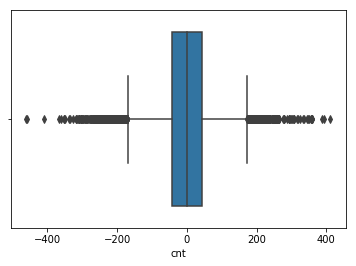

In [22]:
sns.boxplot(errors)

* I think that we can more or less accept the normality of the errors, although the shapiro test strongly leeds us to reject the Null
* Maybe we have to throw out some outliers or actually do some feature engineering

#### Plot a Q-Q plot to "test" for homoskedasticity

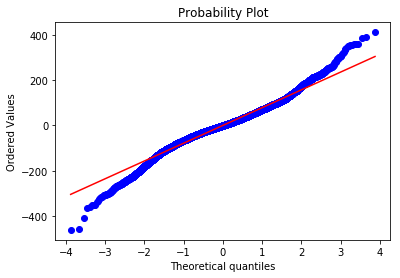

In [23]:
stats.probplot(errors, dist="norm", plot=plt)
plt.show()

(array([3.000e+00, 2.800e+01, 1.880e+02, 6.460e+02, 3.529e+03, 6.254e+03,
        1.963e+03, 3.590e+02, 5.000e+01, 1.400e+01]),
 array([-461.12929353, -373.89003247, -286.65077141, -199.41151035,
        -112.17224929,  -24.93298823,   62.30627283,  149.54553389,
         236.78479495,  324.02405601,  411.26331707]),
 <a list of 10 Patch objects>)

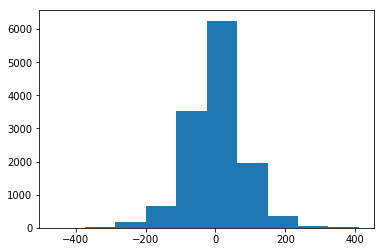

In [24]:
plt.hist(errors)

The errors seem to be quite normal and almost evenly distributed over the whole space except for the fat right tail. What is the cause for these observations?

In [28]:
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sm.stats.jarque_bera(errors)
name, test

(['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis'],
 (2257.8964150763936, 0.0, -0.12098136622592892, 5.02459986003404))

# Inspect the outliers!!!